In [0]:
displayHTML("""
<p>This notebook contains the Python codes for the UNSD-FAO-ITC joint methodology on outliers detection. The steps are:</p>
<p><ul>
<li> Extract Mozambique rice imports data (df); </li>
<li> Import SUV table downloaded from COMTRADE (SUV); </li>
<li> Merge df with SUV; </li>
<li> Estimate missing netweights as value/SUV, put a flag; </li>
<li> Calulate ratio of available records by period for each partner to total number of periods; </li>
<li> Calculate new variables for Z score;</li>
<li> To be continued... </li>
</ul></p>
""")

This notebook contains the Python codes for the UNSD-FAO-ITC joint methodology on outliers detection. The steps are: 
 
 Extract Mozambique rice imports data (df); 
 Import SUV table downloaded from COMTRADE (SUV); 
 Merge df with SUV; 
 Estimate missing netweights as value/SUV, put a flag; 
 Calulate ratio of available records by period for each partner to total number of periods; 
 Calculate new variables for Z score; 
 To be continued...

In [0]:
%sql
DESCRIBE  delta.dtarifflineannual

col_name,data_type,comment
datasetCode,bigint,
typeCode,string,
freqCode,string,
refPeriodId,int,
period,int,
reporterCode,int,
flowCategory,string,
flowCode,string,
partnerCode,int,
partner2Code,int,


In [0]:
displayHTML("""
<p>Extract Mozambique rice imports annual data for all partners between 2000-2019.</p>
""")

df = sqlContext.sql("select reporterCode, partnerCode, period, cmdCode, primaryValue, netWgt, qtyUnitCode, altQtyUnitCode, altQty from delta.dtarifflineannual where reporterCode = '508' and flowCode = 'M' and cmdCode like '100630%' and period BETWEEN 2000 AND 2019")

df.show()

Extract Mozambique rice imports annual data for all partners between 2000-2019.

+------------+-----------+------+--------+------------+-------+-----------+--------------+------+
reporterCode|partnerCode|period| cmdCode|primaryValue| netWgt|qtyUnitCode|altQtyUnitCode|altQty|
+------------+-----------+------+--------+------------+-------+-----------+--------------+------+
 508| 410| 2012|10063000| 100.0| 1.0| 8| -1| null|
 508| 480| 2012|10063000| 493620.0| 1.0| 8| -1| null|
 508| 586| 2012|10063000| 30590.0| 1.0| 8| -1| null|
 508| 586| 2012|10063000| 26700.0| 1.0| 8| -1| null|
 508| 586| 2012|10063000| 245970.0| 1.0| 8| -1| null|
 508| 710| 2012|10063000| 160.0| 30.0| 8| -1| null|
 508| 784| 2012|10063000| 9340.0| 2.0| 8| -1| null|
 508| 710| 2012|10063000| 750.0| 60.0| 8| -1| null|
 508| 710| 2012|10063000| 470.0| 251.0| 8| -1| null|
 508| 76| 2012|10063000| 590.0| 437.0| 8| -1| null|
 508| 76| 2012|10063000| 12040.0|27389.0| 8| -1| null|
 508| 76| 2012|10063000| 700.0| 941.0| 8| -1| null|
 508| 748| 2012|10063000| 240.0| 1.0| 8| -1| null|
 508| 76| 2012|10063000| 14010.0| 1.0| 8| -1| null|
 508| 764| 2012|10063000| 195500.0| 1.0| 8| -1| null|
 508| 764| 2012|10063000| 291910.0| 1.0| 8| -1| null|
 508| 410| 2012|10063000| 310.0| 1.0| 8| -1| null|
 508| 710| 2012|10063000| 250.0| 200.0| 8| -1| null|
 508| 704| 2012|10063000| 415950.0| 2.0| 8| -1| null|
 508| 704| 2012|10063000| 218340.0| 500.0| 8| -1| null|
+------------+-----------+------+--------+------------+-------+-----------+--------------+------+
only showing top 20 rows

In [0]:
displayHTML("""
<p>Convert the df to a pandas dataframe for the next steps.</p>
""")

df = df.toPandas()

Convert the df to a pandas dataframe for the next steps.

In [0]:
#df['altQtyUnitCode'].unique()
df['altQty'].nunique()

Out[12]: 235

In [0]:
displayHTML("""
<p>We will need pandas and numpy modules of python for later manipulations. Let's import these.</p>
""")

import pandas as pd
import numpy as np

We will need pandas and numpy modules of python for later manipulations. Let's import these.

In [0]:
displayHTML("""
<p>Load SUV table uploaded to FileStore from "https://unstats.un.org/unsd/trade/data/tables.asp#SUV"</p>
<p><i>NOTE: the file was ANSI encoded which pandas/databricks couldn't read so it was converted to utf-8 in windows</i></p>
""")

SUV = pd.read_csv("/dbfs/FileStore/tables/TSUV_tabDelimUtf.txt", sep="\t")

SUV.head()

Load SUV table uploaded to FileStore from "https://unstats.un.org/unsd/trade/data/tables.asp#SUV" 
 NOTE: the file was ANSI encoded which pandas/databricks couldn't read so it was converted to utf-8 in windows

Out[63]:

,series_type,table_type,table_type_desc,country_code,country_type,country_english_name,year,period_type,period_number,period,period_in_date,trade_flow,trade_flow_desc,commodity_classification,commodity_group_code,commodity_group_name,partner_country_code,partner_country_english_name,base_year,currency_type,value,value_unit,value_type,value_type_desc,estimation_type,estimation_type_desc,insert_date
0,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2017,A,0,201752,01/01/2017,X,Exports,H3,481019,Paper and paperboard; coated with kaolin or ot...,0,World,NaN,$,0.787312,NaN,$/kg,$/kg,C,Calculate,2019-02-01 22:03:04.780000000
1,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2018,A,0,201852,01/01/2018,M,Imports,H3,481019,Paper and paperboard; coated with kaolin or ot...,0,World,NaN,$,0.967803,NaN,$/kg,$/kg,C,Calculate,2019-02-01 22:03:04.780000000
2,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2018,A,0,201852,01/01/2018,X,Exports,H3,481019,Paper and paperboard; coated with kaolin or ot...,0,World,NaN,$,0.907177,NaN,$/kg,$/kg,C,Calculate,2019-02-01 22:03:04.780000000
3,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2019,A,0,201952,01/01/2019,M,Imports,H4,21092,"Meat and edible meat offal; salted, in brine, ...",0,World,NaN,$,3.136390,NaN,$/kg,$/kg,C,Calculate,2020-08-22 04:00:10.730000000
4,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2019,A,0,201952,01/01/2019,X,Exports,H1,30211,"Fish; trout (salmo trutta, oncorhynchus mykiss...",0,World,NaN,$,6.042038,NaN,$/kg,$/kg,C,Calculate,2020-08-22 04:00:10.730000000


In [0]:
displayHTML("""
<p>Subset the SUV table to keep only imports(flow_code=M) of rice(commodity_group_code=100630).</p>
""")
SUV = SUV[(SUV.trade_flow=="M") & (SUV.commodity_group_code==100630)]

SUV.head()

Subset the SUV table to keep only imports(flow_code=M) of rice(commodity_group_code=100630).

Out[64]:

,series_type,table_type,table_type_desc,country_code,country_type,country_english_name,year,period_type,period_number,period,period_in_date,trade_flow,trade_flow_desc,commodity_classification,commodity_group_code,commodity_group_name,partner_country_code,partner_country_english_name,base_year,currency_type,value,value_unit,value_type,value_type_desc,estimation_type,estimation_type_desc,insert_date
2967,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2019,A,0,201952,01/01/2019,M,Imports,H0,100630,"Cereals; rice, semi-milled or wholly milled, w...",0,World,NaN,$,0.99001,NaN,$/kg,$/kg,C,Calculate,2020-08-22 04:00:10.730000000
2971,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2019,A,0,201952,01/01/2019,M,Imports,H1,100630,"Cereals; rice, semi-milled or wholly milled, w...",0,World,NaN,$,0.99001,NaN,$/kg,$/kg,C,Calculate,2020-08-22 04:00:10.730000000
2973,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2019,A,0,201952,01/01/2019,M,Imports,H2,100630,"Cereals; rice, semi-milled or wholly milled, w...",0,World,NaN,$,0.99001,NaN,$/kg,$/kg,C,Calculate,2020-08-22 04:00:10.730000000
2976,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2019,A,0,201952,01/01/2019,M,Imports,H3,100630,"Cereals; rice, semi-milled or wholly milled, w...",0,World,NaN,$,0.99001,NaN,$/kg,$/kg,C,Calculate,2020-08-22 04:00:10.730000000
3135,TSUV.A.$/kg.,TSUV,Standard Unit Value,0,G,World,2019,A,0,201952,01/01/2019,M,Imports,H4,100630,"Cereals; rice, semi-milled or wholly milled, w...",0,World,NaN,$,0.99001,NaN,$/kg,$/kg,C,Calculate,2020-08-22 04:00:10.730000000


In [0]:
displayHTML("""
<p>Keep only necessary columns in SUV and drop prefix H from commodity classification version. We will use the version number later to sort and remove duplicates keeping only the latest version.</p>
""")
SUV = SUV[['year', 'commodity_group_code', 'commodity_classification', 'value']]
SUV['commodity_classification'] = SUV['commodity_classification'].str[1:2]

SUV.head()

Keep only necessary columns in SUV and drop prefix H from commodity classification version. We will use the version number later to sort and remove duplicates keeping only the latest version.

Out[65]:

,year,commodity_group_code,commodity_classification,value
2967,2019,100630,0,0.99001
2971,2019,100630,1,0.99001
2973,2019,100630,2,0.99001
2976,2019,100630,3,0.99001
3135,2019,100630,4,0.99001


In [0]:
displayHTML("""
<p>Now let's sort on year, commodity code and classification version, and then drop duplicates based on year and commodity by keeping last record. This will make sure that the record with the latest classification version remains.</p>
""")
SUV = SUV.sort_values(by=['year', 'commodity_group_code', 'commodity_classification'])
SUV = SUV.drop_duplicates(subset = ['year', 'commodity_group_code'], keep = 'last')

display(SUV)

Now let's sort on year, commodity code and classification version, and then drop duplicates based on year and commodity by keeping last record. This will make sure that the record with the latest classification version remains.

year,commodity_group_code,commodity_classification,value
2000,100630,1,0.4594807101147744
2001,100630,1,0.43383527608286576
2002,100630,2,0.4177143368275559
2003,100630,2,0.4449883360429556
2004,100630,2,0.4063152217221777
2005,100630,2,0.4528555421889114
2006,100630,2,0.5424344280391865
2007,100630,3,0.5889290141642495
2008,100630,3,0.9503820730463034
2009,100630,3,0.8906380166566829


In [0]:
displayHTML("""
<p>Now merge the SUVs with the datasets by year and commodity code. We need to rename SUV's year column as period and create a column in df with 6-digits commodity codes named as commodity_group_code. This ensures that the two dataframes have two columns each with same titles to merge on. Also, renaming the SUV column from value to SUV to avoid confusion with primaryValue.</p>
""")
SUV.rename(columns = {'year':'period',
                     'value': 'SUV'},
           inplace = True)
SUV['commodity_group_code'] = SUV['commodity_group_code'].astype(str)
df['commodity_group_code'] = df['cmdCode'].str[:6]
df = pd.merge(df, SUV, how='left')

df.head()

Now merge the SUVs with the datasets by year and commodity code. We need to rename SUV's year column as period and create a column in df with 6-digits commodity codes named as commodity_group_code. This ensures that the two dataframes have two columns each with same titles to merge on. Also, renaming the SUV column from value to SUV to avoid confusion with primaryValue.

Out[67]:

,reporterCode,partnerCode,period,cmdCode,primaryValue,netWgt,qtyUnitCode,commodity_group_code,commodity_classification,SUV
0,508,410,2012,10063000,100.0,1.0,8,100630,4,1.005174
1,508,480,2012,10063000,493620.0,1.0,8,100630,4,1.005174
2,508,586,2012,10063000,30590.0,1.0,8,100630,4,1.005174
3,508,586,2012,10063000,26700.0,1.0,8,100630,4,1.005174
4,508,586,2012,10063000,245970.0,1.0,8,100630,4,1.005174


In [0]:
displayHTML("""
<p>If netWgt is null, it will be estimated as primaryValue/value (SUV). But before that, create a flag variable which will be 1 if net weight is estimated, 0 otherwise.</p>
<p>Next, if qtyUnitCode is -1, force it to 8.</p>
""")
df['flag'] = np.where(df['netWgt'].isnull(), 1, 0)
df['netWgt_complete'] = np.where(df['netWgt'].isnull(), (df['primaryValue']/df['SUV']), df['netWgt'])
df['qtyUnitCode'] = pd.to_numeric(df['qtyUnitCode'])
df['qtyUnitCode_complete'] = np.where((df['qtyUnitCode']==-1), 8, df['qtyUnitCode'])

display(df)

If netWgt is null, it will be estimated as primaryValue/value (SUV). But before that, create a flag variable which will be 1 if net weight is estimated, 0 otherwise. 
 Next, if qtyUnitCode is -1, force it to 8.

reporterCode,partnerCode,period,cmdCode,primaryValue,netWgt,qtyUnitCode,commodity_group_code,commodity_classification,SUV,flag,netWgt_complete,qtyUnitCode_complete
508,410,2012,10063000,100.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8
508,480,2012,10063000,493620.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8
508,586,2012,10063000,30590.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8
508,586,2012,10063000,26700.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8
508,586,2012,10063000,245970.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8
508,710,2012,10063000,160.0,30.0,8,100630,4,1.0051739930809729,0,30.0,8
508,784,2012,10063000,9340.0,2.0,8,100630,4,1.0051739930809729,0,2.0,8
508,710,2012,10063000,750.0,60.0,8,100630,4,1.0051739930809729,0,60.0,8
508,710,2012,10063000,470.0,251.0,8,100630,4,1.0051739930809729,0,251.0,8
508,76,2012,10063000,590.0,437.0,8,100630,4,1.0051739930809729,0,437.0,8


In [0]:
displayHTML("""
<p>Below codes can be run (only one at a time, comment out whichever you don't want to run) to check whether we accomplished all changes we wanted to make.</p>
""")

#df[df['netWgt'].isnull()].head()
#df[df['qtyUnitCode']==-1].head()

Below codes can be run (only one at a time, comment out whichever you don't want to run) to check whether we accomplished all changes we wanted to make.

In [0]:
displayHTML("""
<p>First create a table with partner, commodity and period; and then count how many periods by that combination are there.</p>
""")

count_series = df.groupby(['partnerCode', 'commodity_group_code', 'period']).size()
freq_df = count_series.to_frame(name = 'size').reset_index()

display(freq_df)

First create a table with partner, commodity and period; and then count how many periods by that combination are there.

partnerCode,commodity_group_code,period,size
4,100630,2013,1
4,100630,2015,1
4,100630,2019,1
32,100630,2018,2
36,100630,2001,1
36,100630,2002,2
56,100630,2000,1
56,100630,2010,1
72,100630,2013,1
76,100630,2004,1


In [0]:
displayHTML("""
<p>Many partners have multiple records per period. But we're interested in the ratio of number of periods for which records are available to total periods.</p>
""")

freq_df = freq_df.drop(['size'], axis = 1)
freq_df = freq_df.groupby(['partnerCode', 'commodity_group_code']).size()
freq_df = freq_df.to_frame(name = 'nperiod').reset_index()

display(freq_df)

Many partners have multiple records per period. But we're interested in the ratio of number of periods for which records are available to total periods.

partnerCode,commodity_group_code,nperiod
4,100630,3
32,100630,1
36,100630,2
56,100630,2
72,100630,1
76,100630,9
97,100630,1
104,100630,6
116,100630,1
156,100630,20


In [0]:
displayHTML("""
<p>Finally, calculate the ratio by dividing by total number of periods.</p>
""")

#number of all periods
n = df['period'].nunique()

freq_df['share'] = freq_df['nperiod']/n

display(freq_df)


Finally, calculate the ratio by dividing by total number of periods.

partnerCode,commodity_group_code,nperiod,share
4,100630,3,0.15
32,100630,1,0.05
36,100630,2,0.1
56,100630,2,0.1
72,100630,1,0.05
76,100630,9,0.45
97,100630,1,0.05
104,100630,6,0.3
116,100630,1,0.05
156,100630,20,1.0


In [0]:
displayHTML("""
<p>Save the dataframes as csv in FileStore</p>
""")

#df.to_csv("/dbfs/FileStore/tables/OutlierDf_SUV.csv")
#freq_df.to_csv("/dbfs/FileStore/tables/FrequencyRatio.csv")

Save the dataframes as csv in FileStore

Very few partners have records for more than 80% of the periods.

Out[74]:

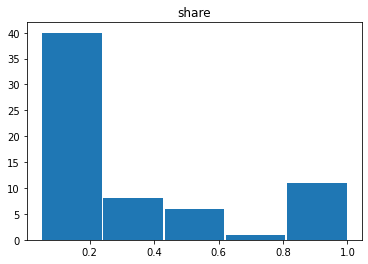

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb5d6bf790>]],
 dtype=object)

In [0]:
displayHTML("""
<p>Very few partners have records for more than 80% of the periods.</p>
""")

freq_df.hist(column="share", bins=5, grid=False, rwidth=.97)

But these partners account for majority of values.

Out[75]:

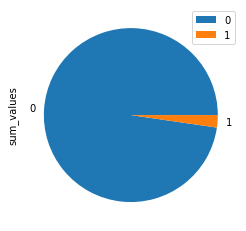

<matplotlib.axes._subplots.AxesSubplot at 0x7ffb2fa914f0>

In [0]:
displayHTML("""
<p>But these partners account for majority of values.</p>
""")

group1 = freq_df[freq_df["share"]>=0.8]["partnerCode"]
group2 = freq_df[freq_df["share"]<0.8]["partnerCode"]

sum1 = df[df["partnerCode"].isin(group1)]["primaryValue"].sum()
sum2 = df[df["partnerCode"].isin(group2)]["primaryValue"].sum()

pie_df = pd.DataFrame({'partner_group': ["more_than_80%", "less_than_80%"],
                   'sum_values': [sum1, sum2]})

pie_df.plot(kind='pie', y='sum_values')


In [0]:
pie_df

Out[76]:

,partner_group,sum_values
0,more_than_80%,2.450865e+09
1,less_than_80%,5.768963e+07


In [0]:
displayHTML("""
<p>Prepare Z-test variables:</p>
<p><ul>
<li>Log of primaryValue (logV)</li>
<li>Unit values (UV);</li>
<li>Log of unit values (logUV)</li>
<li>Log of quantity (logQty);</li>
</ul></p>
""")


df["logV"] = np.log(df["primaryValue"])
df["UV"] = df["primaryValue"]/df["netWgt_complete"]
df["logUV"] = np.log(df["UV"])
df["logQty"] = np.log(df["netWgt_complete"])

#df.head()

Prepare Z-test variables: 
 
 Log of primaryValue (logV) 
 Unit values (UV); 
 Log of unit values (logUV) 
 Log of quantity (logQty);

In [0]:
displayHTML("""
<p>For each reporter, partner and commodity combination, calculate mean of:</p>
<p><ul>
<li>primaryValue</li>
<li>logV</li>
<li>UV;</li>
<li>logUV</li>
<li>netWgt_complete</li>
<li>logQty;</li>
</ul></p>
""")

df_mean = df.groupby(["reporterCode", "partnerCode", "commodity_group_code"]).agg({'primaryValue':'mean',
     'logV':'mean',
    'UV':'mean',
    'logUV':'mean',
    'netWgt_complete':'mean',
    'logQty':'mean',
    }).reset_index()

#display(df_mean)

For each reporter, partner and commodity combination, calculate mean of: 
 
 primaryValue 
 logV 
 UV; 
 logUV 
 netWgt_complete 
 logQty;

In [0]:
displayHTML("""
<p>Merge the dataframe of reporter-partner-commodity specific means with the main dataframe. We need to rename some columns first.</p>
""")

df_mean.rename(columns = {'primaryValue':'meanV',
                          'logV':'meanlogV',
                          'UV':'meanUV',
                          'logUV':'meanlogUV',
                          'netWgt_complete':'meanQty',
                          'logQty':'meanlogQty'},
               inplace = True)

df = pd.merge(df, df_mean, how='left')

Merge the dataframe of reporter-partner-commodity specific means with the main dataframe. We need to rename some columns first.

Out[82]: reporterCode 3399
partnerCode 3399
period 3399
cmdCode 3399
primaryValue 3399
netWgt 2288
qtyUnitCode 3399
commodity_group_code 3399
commodity_classification 3399
SUV 3399
flag 3399
netWgt_complete 3399
qtyUnitCode_complete 3399
logV 3399
UV 3399
logUV 3399
logQty 3399
meanV 3399
meanlogV 3399
meanUV 3399
meanlogUV 3399
meanQty 3399
meanlogQty 3399
dtype: int64

In [0]:
displayHTML("""<p>Calculate more Z-test variables:</p>
<p><ul>
<li>primaryValue - mean value = diffV</li>
<li>absolute primaryValue - mean value = ABSdiffV</li>
<li>logV - mean logV = difflogV</li>
<li>absolute logV - mean logV = ABSdifflogV</li>
<li>UV - mean UV = diffUV</li>
<li>absolute UV - mean UV = ABSdiffUV</li>
<li>logUV - mean logUV = difflogUV</li>
<li>absolute logUV - mean logUV = ABSdifflogUV</li>
<li>netWgt_complete - meanQty = diffQty</li>
<li>absolute netWgt_complete - meanQty = ABSdiffQty</li>
<li>logQty - mean logQty = difflogQty</li>
<li>absolute logQty - mean logQty = ABSdifflogQty</li>
</ul></p>
""")

df['diffV'] = df['primaryValue'] - df['meanV']
df['ABSdiffV'] = abs(df['diffV'])

df['difflogV'] = df['logV'] - df['meanlogV']
df['ABSdifflogV'] = abs(df['difflogV'])

df['diffUV'] = df['UV'] - df['meanUV']
df['ABSdiffUV'] = abs(df['diffUV'])

df['difflogUV'] = df['logUV'] - df['meanlogUV']
df['ABSdifflogUV'] = abs(df['difflogUV'])

df['diffQty'] = df['netWgt_complete'] - df['meanQty']
df['ABSdiffQty'] = abs(df['diffQty'])

df['difflogQty'] = df['logQty'] - df['meanlogQty']
df['ABSdifflogQty'] = abs(df['difflogQty'])

Calculate more Z-test variables: 
 
 primaryValue - mean value = diffV 
 absolute primaryValue - mean value = ABSdiffV 
 logV - mean logV = difflogV 
 absolute logV - mean logV = ABSdifflogV 
 UV - mean UV = diffUV 
 absolute UV - mean UV = ABSdiffUV 
 logUV - mean logUV = difflogUV 
 absolute logUV - mean logUV = ABSdifflogUV 
 netWgt_complete - meanQty = diffQty 
 absolute netWgt_complete - meanQty = ABSdiffQty 
 logQty - mean logQty = difflogQty 
 absolute logQty - mean logQty = ABSdifflogQty

In [0]:
display(df)

reporterCode,partnerCode,period,cmdCode,primaryValue,netWgt,qtyUnitCode,commodity_group_code,commodity_classification,SUV,flag,netWgt_complete,qtyUnitCode_complete,logV,UV,logUV,logQty,meanV,meanlogV,meanUV,meanlogUV,meanQty,meanlogQty,diffV,ABSdiffV,difflogV,ABSdifflogV,diffUV,ABSdiffUV,difflogUV,ABSdifflogUV,diffQty,ABSdiffQty,difflogQty,ABSdifflogQty
508,410,2012,10063000,100.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8,4.605170185988092,100.0,4.605170185988092,0.0,445.9705055047867,5.197105544619709,38.38024111113837,-0.9709451015700369,124858.2013870523,6.168050646189745,-345.9705055047867,345.9705055047867,-0.5919353586316172,0.5919353586316172,61.61975888886163,61.61975888886163,5.576115287558129,5.576115287558129,-124857.2013870523,124857.2013870523,-6.168050646189745,6.168050646189745
508,480,2012,10063000,493620.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8,13.109521269391031,493620.0,13.109521269391031,0.0,122233.23489521256,11.142465970466759,70517.34150796282,-2.942982073362778,1.2107940620565318E8,14.085448043829533,371386.7651047874,371386.7651047874,1.9670552989242722,1.9670552989242722,423102.6584920372,423102.6584920372,16.05250334275381,16.05250334275381,-1.2107940520565318E8,1.2107940520565318E8,-14.085448043829533,14.085448043829533
508,586,2012,10063000,30590.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8,10.328428437144948,30590.0,10.328428437144948,0.0,941289.0448865617,12.482523902771856,1360.2072747099537,-1.1920731750798117,1.1528396467176454E9,13.67459707785167,-910699.0448865617,910699.0448865617,-2.1540954656269076,2.1540954656269076,29229.792725290048,29229.792725290048,11.52050161222476,11.52050161222476,-1.1528396457176454E9,1.1528396457176454E9,-13.67459707785167,13.67459707785167
508,586,2012,10063000,26700.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8,10.19241884438834,26700.0,10.19241884438834,0.0,941289.0448865617,12.482523902771856,1360.2072747099537,-1.1920731750798117,1.1528396467176454E9,13.67459707785167,-914589.0448865617,914589.0448865617,-2.2901050583835154,2.2901050583835154,25339.792725290048,25339.792725290048,11.384492019468151,11.384492019468151,-1.1528396457176454E9,1.1528396457176454E9,-13.67459707785167,13.67459707785167
508,586,2012,10063000,245970.0,1.0,8,100630,4,1.0051739930809729,0,1.0,8,12.412964856258332,245970.0,12.412964856258332,0.0,941289.0448865617,12.482523902771856,1360.2072747099537,-1.1920731750798117,1.1528396467176454E9,13.67459707785167,-695319.0448865617,695319.0448865617,-0.06955904651352363,0.06955904651352363,244609.79272529006,244609.79272529006,13.605038031338143,13.605038031338143,-1.1528396457176454E9,1.1528396457176454E9,-13.67459707785167,13.67459707785167
508,710,2012,10063000,160.0,30.0,8,100630,4,1.0051739930809729,0,30.0,8,5.075173815233827,5.333333333333333,1.6739764335716716,3.4011973816621555,35319.485293009835,8.124496576748506,47.17453738072059,-1.5605133283468067,3.855663082772211E7,9.685009905095319,-35159.485293009835,35159.485293009835,-3.049322761514679,3.049322761514679,-41.84120404738725,41.84120404738725,3.2344897619184785,3.2344897619184785,-3.855660082772211E7,3.855660082772211E7,-6.283812523433163,6.283812523433163
508,784,2012,10063000,9340.0,2.0,8,100630,4,1.0051739930809729,0,2.0,8,9.142061531222888,4670.0,8.448914350662942,0.6931471805599453,324918.5266888781,9.673529040985512,141.7562431302283,-1.8068996488939915,1.8742324420602667E8,11.480428689879496,-315578.5266888781,315578.5266888781,-0.5314675097626242,0.5314675097626242,4528.2437568697715,4528.2437568697715,10.255813999556935,10.255813999556935,-1.8742324220602667E8,1.8742324220602667E8,-10.78728150931955,10.78728150931955
508,710,2012,10063000,750.0,60.0,8,100630,4,1.0051739930809729,0,60.0,8,6.620073206530356,12.5,2.5257286443082556,4.0943445622221,35319.485293009835,8.124496576748506,47.17453738072059,-1.5605133283468067,3.855663082772211E7,9.685009905095319,-34569.485293009835,34569.485293009835,-1.5044233702181495,1.5044233702181495,-34.67453738072059,34.674537380720

In [0]:
df.count()

Out[88]: reporterCode 3399
partnerCode 3399
period 3399
cmdCode 3399
primaryValue 3399
netWgt 2288
qtyUnitCode 3399
commodity_group_code 3399
commodity_classification 3399
SUV 3399
flag 3399
netWgt_complete 3399
qtyUnitCode_complete 3399
logV 3399
UV 3399
logUV 3399
logQty 3399
meanV 3399
meanlogV 3399
meanUV 3399
meanlogUV 3399
meanQty 3399
meanlogQty 3399
diffV 3399
ABSdiffV 3399
difflogV 3399
ABSdifflogV 3399
diffUV 3399
ABSdiffUV 3399
difflogUV 3399
ABSdifflogUV 3399
diffQty 3399
ABSdiffQty 3399
difflogQty 3399
ABSdifflogQty 3399
dtype: int64